### Confusion Matrix
Aside from the various metrics that we can use to evaluate our model, we can also evaluate our model by creating a confusion matrix. A confusion matrix works well with problems that have few potential classes (labels). This can be achieved in TensorFlow using a custom method or by using [scikit-learn confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) library.

The following was copied directly from the documentation to illustrate its functionality.

In [1]:
from sklearn.metrics import confusion_matrix

y_pred = [1, 1, 1, 1, 0, 1, 0, 1, 0, 0] # All of the predictions made by the model
y_true = [1, 0, 1, 1, 1, 1, 0, 0, 0, 0] # All the labels in our dataset.


confusion_matrix(y_true, y_pred)

array([[3, 2],
       [1, 4]], dtype=int64)

What we see above (in the output) is the resulting confusion matrix. A confusion matrix is a 2 by 2 matrix that holds 4 values.

**Positives**

1) Top left: **True negatives** - values that our model correctly guessed, that were false.
2) Top right: **False Positives** - Values that our model incorrectly guessed that were positive.

**Negatives**

3) Bottom Left: **False negatives** - Values that our model incorrectly guessed that were negative.
4) Bottom right: **True positives** - values that our model correctly guessed, that were true.

## Visualising Our Confusion Matrix
Once we have our confusion matrix we can turn it into a plot so that our analysis is more meaningful to other people.

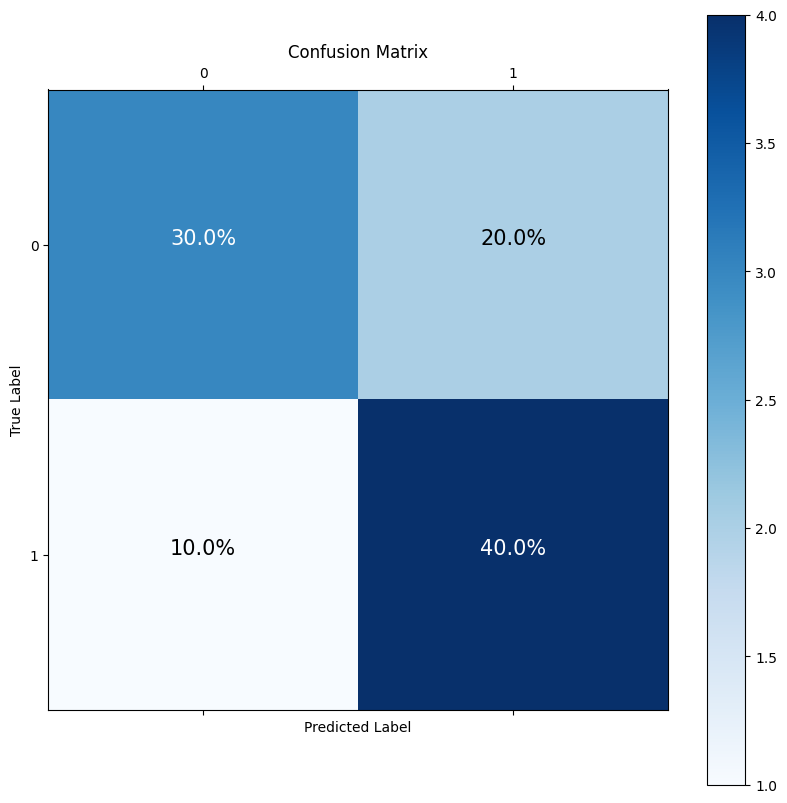

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

figsize = (10,10)

cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype("float") / cm.sum(axis=1)[: , np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create some classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Labels the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
       )

# Set thresholds for different colours
threshold = (cm.max() + cm.min()) / 2

# Plot some text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]*10:.1f}%",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)